In [1]:
import warnings
warnings.filterwarnings('ignore')

# Load NeuroKit and other useful packages
import os
#!pip install neurokit2
import neurokit2 as nk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]  # Bigger images

In [2]:
sampling_rate = 1000

In [3]:
# Create lists for iteration

vpn_list = list(range(1,71))
vpn_list_str = ['01','02','03','04','05','06','07','08','09'] + list(map(str, range(10, 71)))
append_str = "v"
vpn = [append_str + sub for sub in vpn_list_str]

vpn_list_data = []
for i in range(len(vpn_list)):
    vpn_list_data_raw = 'sample-data/00{vpn_list_str}'
    vpn_list_data_str = vpn_list_data_raw.format(vpn_list_str = vpn_list_str[i])
    vpn_list_data.append(vpn_list_data_str)

append_str = '.npy'
vpn_list_file = [sub + append_str for sub in vpn_list_data]

append_str = 'drive/MyDrive/Masterarbeit/Code/two-hearts/'
vpn_list_file_google = [append_str + sub for sub in vpn_list_file]

In [4]:
''' AS DICTIONARY '''

# data = {}
# for i in range(len(vpn_list)):
#     data[vpn[i]] = np.load(vpn_list_file[i])

# print(data.keys)
# # print(a)
# #print(a.items()) #prints keys and values
# # print(data.keys()) #prints keys
# # print(data.values()) #prints values

# print(len(data["v02"]))
# #print(data["v02"])

' AS DICTIONARY '

In [5]:
''' AS NESTED LIST'''

''' CHANGE EVERYTHING TO NP.APPEND !!!'''

#test = np.load('drive/MyDrive/Masterarbeit/Code/two-hearts/sample-data/0004.npy')

data_raw = [None]*len(vpn_list)

for i in range(len(vpn_list)):
    data_raw[i] = np.load(vpn_list_file[i])
    #data_raw[i] = np.load(vpn_list_file_google[i])
# print(data[0])

data_raw[0].dtype

data_raw = np.squeeze(data_raw)
print(data_raw.shape)
print(type(data_raw))
print(len(data_raw))
print((data_raw))
data_raw.dtype
print(type(data_raw))
# data_raw.flatten()
# print(data_raw)

(70, 320000)
<class 'numpy.ndarray'>
70
[[-5.40546514e-02 -6.73756152e-02 -7.54788741e-02 ... -8.12697336e-02
  -7.43325576e-02 -6.27508312e-02]
 [-1.11504100e-01 -2.24329799e-01 -3.51644188e-01 ...  1.36222959e-01
   5.75141869e-02 -1.48313185e-02]
 [ 7.19785541e-02  6.49988204e-02  5.74737862e-02 ...  2.18116838e-04
   1.52681787e-02  2.39383224e-02]
 ...
 [-7.48894691e+00  8.35463142e+00  7.83945274e+00 ...  8.49027634e+00
   8.05241489e+00  7.99625826e+00]
 [-1.20854805e+02  9.52262974e+00  1.90112503e+02 ... -2.18874722e+01
  -1.54426926e+02 -3.71576904e+02]
 [ 8.98728180e+01  9.12158966e+01  9.13373718e+01 ...  1.19475067e+02
   1.19292282e+02  1.19139015e+02]]
<class 'numpy.ndarray'>


In [6]:
# Data cleaning AND normalization with nk2
'''WARNING: NORMALIZATION OF ALL DATA (NOT WITH TEST SET)
data = [None]*len(vpn_list)
for i in range(len(vpn_list)):
    a = data_clean[i]
    a -= np.mean(a)
    a /= np.std(a)
    data[i] = a '''

data_clean = [None]*len(vpn_list)

for i in range(len(vpn_list)):
    data_clean[i] = (nk.ecg_clean(data_raw[i], sampling_rate=1000, method="neurokit"))

print(type(data_clean))
print(type(data_clean[1]))
data_clean = np.array(data_clean)
print(type(data_clean))

data_1k = [None]*len(vpn_list)
for i in range(len(vpn_list)):
    temp = data_clean[i]
    temp = temp[10000:310000] # some strange things can happen in the start in end of the cleaned signal with nk2
    data_1k[i] = temp
#plot = nk.ecg_plot(ecg_signals[:30000], sampling_rate=sampling_rate)


<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
length = [None]*len(vpn_list)
for i in range(len(vpn_list)):
    length[i] = len(data_1k[i])

print(len(length), min(length), max(length))


70 300000 300000


In [8]:
# Quality check
quali = ["str"]*100
for i in range(60): ### wtf when > 60
    temp = nk.ecg_quality(data_1k[i], rpeaks=None, sampling_rate=1000, method="zhao2018", approach=None) # fuzzy & simple approach
    quali[i] = temp

In [9]:
#print(quali)

for i, j in enumerate(quali):
    if j == 'Excellent':
        print(i)        

0
16
20
44


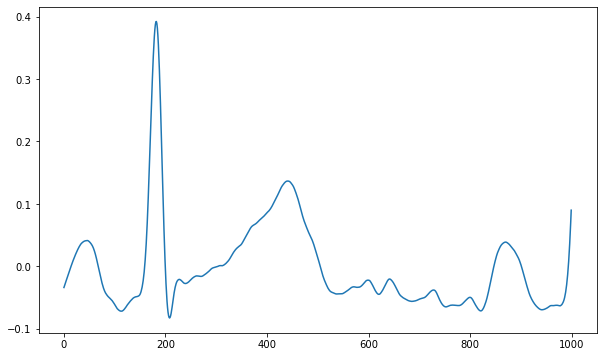

In [10]:
# plt.plot(data_raw[60[:100]])
vpn_ = 0
vpn_data = data_1k[vpn_]

plt.plot(vpn_data[0:1000])

# nk.ecg_intervalrelated(ecg_signals)


In [11]:
# Downsampling to 100 Hz

data = [None]*len(vpn_list)
for i in range(len(vpn_list)):
    temp = data_1k[i] 
    temp = temp[::10]
    data[i] = temp

In [12]:
print(len(data[1]))
print(len(data_1k[1]))

print(len(data_1k))

30000
300000
70


In [13]:
print(nk.ecg_quality(data_1k[0], rpeaks=None, sampling_rate=1000, method="zhao2018", approach=None)) # fuzzy & simple approach
print(nk.ecg_quality(data[0], rpeaks=None, sampling_rate=100, method="zhao2018", approach=None)) # fuzzy & simple approach


Excellent
Excellent


In [14]:
print(type(data))
print((data[1].dtype))

data = np.array(data, dtype="float32")
print(type(data))
print((data.dtype))
print((data[1].dtype))

data.shape
data[0].shape

#ecg_clean.to_csv('data.csv')  

<class 'list'>
float64
<class 'numpy.ndarray'>
float32
float32


(30000,)

In [20]:
np.save('data0.npy',data[0])
np.save('data16.npy',data[16])